# Выясняем где деньги лежат вместе с UCI Adult

In [38]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import io
import requests
import collections
from sklearn import preprocessing


## Описание набора данных UCI Adult
**[Набор](http://archive.ics.uci.edu/ml/machine-learning-databases/adult) данных UCI Adult** (взято из demo тетрадок mlcourse.ai): классификация людей с помощью демографических данных для прогнозирования, зарабатывает ли человек более \$ 50 000 в год.

Описание признаков: 

**Age** – возраст, количественный признак  
**Workclass** – тип работодателя, количественный признак  
**fnlwgt** – итоговый вес обьекта, количественный признак    
**Education** – уровень образования, качественный признак  
**Education_Num** – количество лет обучения, количественный признак  
**Martial_Status** – семейное положение, категориальный признак  
**Occupation** – профессия, категориальный признак  
**Relationship** – тип семейных отношений, категориальный признак    
**Race** – раса, категориальный признак  
**Sex** – пол, качественный признак  
**Capital_Gain** – прирост капитала, количественный признак  
**Capital_Loss** – потери капитала, количественный признак  
**Hours_per_week** – количество часов работы в неделю, количественный признак  
**Country** – страна, категориальный признак  
   
Целевая переменная: **Target** – уровень заработка, категориальный (бинарный) признак  

In [39]:
url="https://github.com/Yorko/mlcourse.ai/raw/master/data/adult_train.csv"
s=requests.get(url).content
data_train =pd.read_csv(io.StringIO(s.decode('utf-8')), sep=';')
data_train.tail(2)

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [40]:
url = 'https://github.com/Yorko/mlcourse.ai/raw/master/data/adult_test.csv'
s=requests.get(url).content
data_test =pd.read_csv(io.StringIO(s.decode('utf-8')), sep=';')
data_test.sample(5)


,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
3208,22,Private,272591.0,10th,6.0,Never-married,Machine-op-inspct,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.
8070,48,Private,216414.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,1977.0,70.0,United-States,>50K.
421,65,Private,88145.0,1st-4th,2.0,Married-civ-spouse,Handlers-cleaners,Husband,Other,Male,0.0,0.0,40.0,NaN,<=50K.
11566,20,Private,182615.0,HS-grad,9.0,Never-married,Handlers-cleaners,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K.
15966,46,Self-emp-not-inc,225065.0,Bachelors,13.0,Separated,Other-service,Unmarried,White,Female,0.0,0.0,45.0,Nicaragua,<=50K.


In [41]:
 #Посмотрим как там дела с образованием
data_train['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [42]:
#посмотрим на таргеты
data_train['Target'].value_counts(dropna=False)

 <=50K    24720
 >50K      7841
Name: Target, dtype: int64

In [43]:
data_test['Target'].value_counts(dropna=False)

 <=50K.    12435
 >50K.      3846
NaN            1
Name: Target, dtype: int64

In [44]:
#NAN нам совсем в тесте не нужен
data_test = data_test[(data_test['Target'] == ' >50K.') 
                      |(data_test['Target']==' <=50K.')]

### EDA и подготовка данных

In [45]:
data_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,32561,NaN,NaN,NaN,38.5816,13.6404,17,28,37,48,90
Workclass,30725,8,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561,NaN,NaN,NaN,189778,105550,12285,117827,178356,237051,1.48470e+06
Education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Num,32561,NaN,NaN,NaN,10.0807,2.57272,1,9,10,12,16
Martial_Status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,30718,14,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


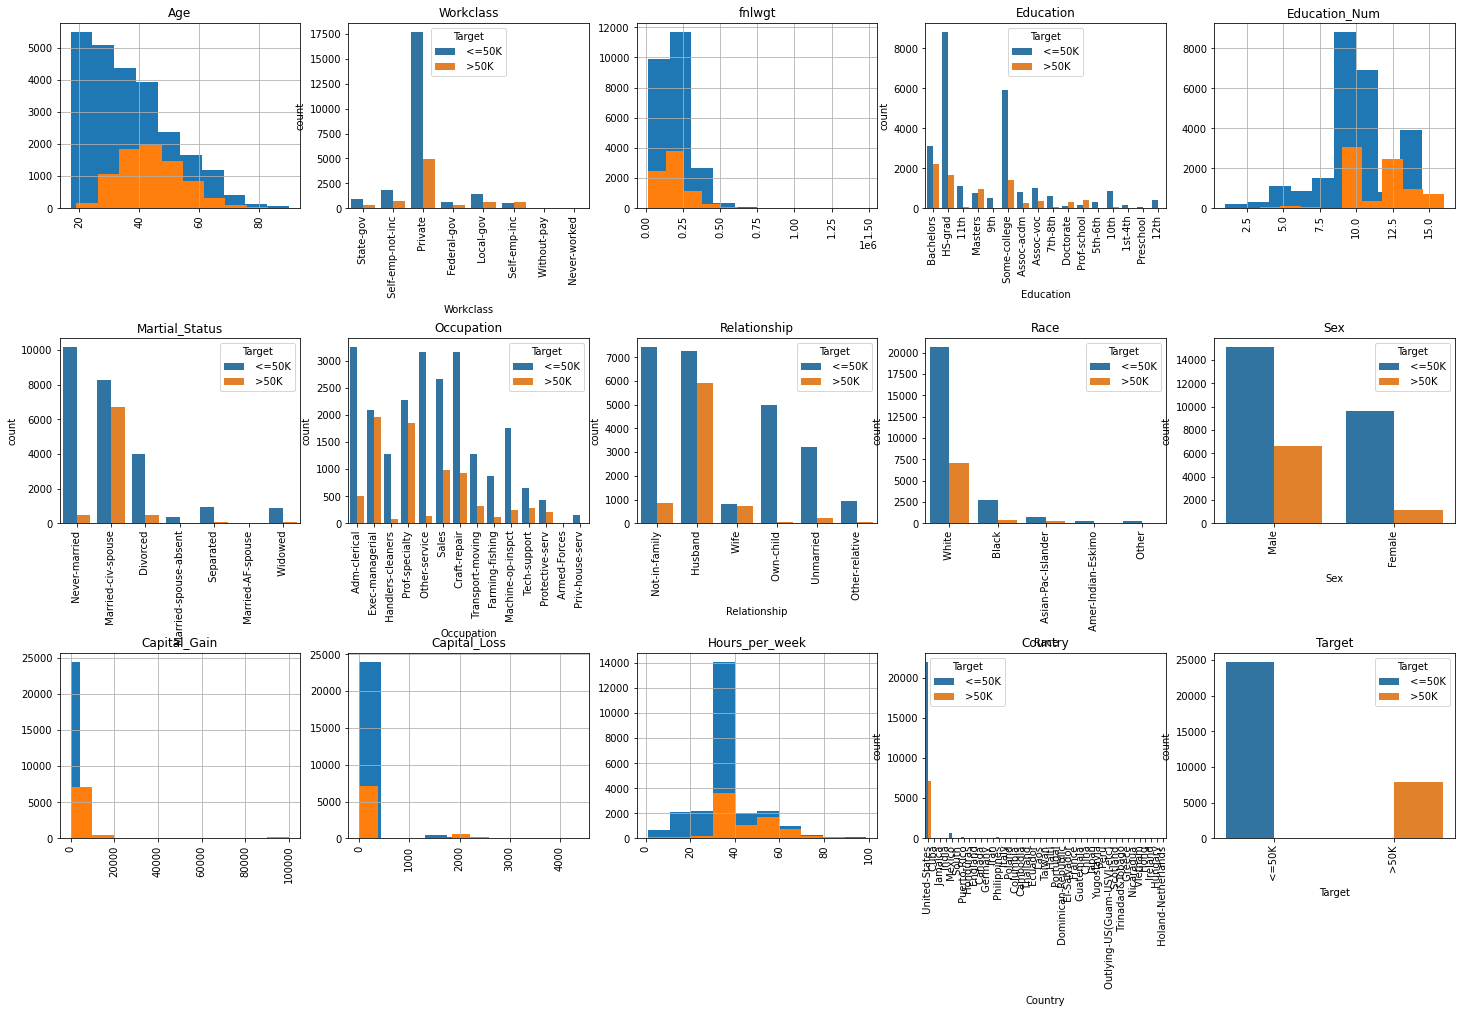

In [46]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(data_train.shape[1]) / cols)
for i, column in enumerate(data_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data_train.dtypes[column] == np.object:
        #data_train[column].value_counts().plot(kind="bar", axes=ax)
        sns.countplot(x=column, data=data_train, axes = ax, hue  = 'Target')
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    else:
        data_train[data_train['Target']==' <=50K'][column].hist(axes=ax)
        data_train[data_train['Target']==' >50K'][column].hist(axes=ax)

        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [47]:
data_test.dtypes[data_test.columns]

Age                object
Workclass          object
fnlwgt            float64
Education          object
Education_Num     float64
Martial_Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_Gain      float64
Capital_Loss      float64
Hours_per_week    float64
Country            object
Target             object
dtype: object

In [48]:
data_test['Age'] = data_test['Age'].astype(int)
data_test['fnlwgt'] = data_test['fnlwgt'].astype(int)
data_test['Education_Num'] = data_test['Education_Num'].astype(int)
data_test['Capital_Gain'] = data_test['Capital_Gain'].astype(int)
data_test['Capital_Loss'] = data_test['Capital_Loss'].astype(int)
data_test['Hours_per_week'] = data_test['Hours_per_week'].astype(int)

In [49]:
# выделим в выборках категориальные и числовые поля

categorical_columns_train = [c for c in data_train.columns 
                             if data_train[c].dtype.name == 'object']
numerical_columns_train = [c for c in data_train.columns 
                           if data_train[c].dtype.name != 'object']

categorical_columns_test = [c for c in data_test.columns 
                            if data_test[c].dtype.name == 'object']
numerical_columns_test = [c for c in data_test.columns 
                          if data_test[c].dtype.name != 'object']

print('categorical_columns_test:', categorical_columns_test)
print('categorical_columns_train:', categorical_columns_train)
print('numerical_columns_test:', numerical_columns_test)
print('numerical_columns_train:', numerical_columns_train)

categorical_columns_test: ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country', 'Target']
categorical_columns_train: ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country', 'Target']
numerical_columns_test: ['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week']
numerical_columns_train: ['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week']


In [50]:
# заполним пропуски

for c in categorical_columns_train:
    data_train[c] = data_train[c].fillna(data_train[c].mode())
for c in categorical_columns_test:
    data_test[c] = data_test[c].fillna(data_train[c].mode())
    
for c in numerical_columns_train:
    data_train[c] = data_train[c].fillna(data_train[c].median())
for c in numerical_columns_test:
    data_test[c] = data_test[c].fillna(data_train[c].median())   

In [51]:
# Помним, что с категориальными признаками нельзя работать напрямую, надо делать OHE, например так
pd.get_dummies(data_train['Workclass'], prefix="Workclass").head(2)

,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0


In [52]:
data_train = pd.concat([data_train, pd.get_dummies(data_train['Workclass'], 
                                                   prefix="Workclass"),
                      pd.get_dummies(data_train['Education'], prefix="Education"),
                      pd.get_dummies(data_train['Martial_Status'], prefix="Martial_Status"),
                      pd.get_dummies(data_train['Occupation'], prefix="Occupation"),
                      pd.get_dummies(data_train['Relationship'], prefix="Relationship"),
                      pd.get_dummies(data_train['Race'], prefix="Race"),
                      pd.get_dummies(data_train['Sex'], prefix="Sex"),
                      pd.get_dummies(data_train['Country'], prefix="Country")],
                     axis=1)

data_test = pd.concat([data_test, pd.get_dummies(data_test['Workclass'], prefix="Workclass"),
                      pd.get_dummies(data_test['Education'], prefix="Education"),
                      pd.get_dummies(data_test['Martial_Status'], prefix="Martial_Status"),
                      pd.get_dummies(data_test['Occupation'], prefix="Occupation"),
                      pd.get_dummies(data_test['Relationship'], prefix="Relationship"),
                      pd.get_dummies(data_test['Race'], prefix="Race"),
                      pd.get_dummies(data_test['Sex'], prefix="Sex"),
                      pd.get_dummies(data_test['Country'], prefix="Country")],
                     axis=1)

In [53]:
#После того как заменили все категориальные переменные на бинарные, надо их не забыть выкинуть
data_train.drop(['Workclass', 'Education', 'Martial_Status',
                 'Occupation', 'Relationship', 'Race', 'Sex', 'Country'],
                axis=1, inplace=True)
data_test.drop(['Workclass', 'Education', 'Martial_Status', 'Occupation', 
                'Relationship', 'Race', 'Sex', 'Country'],
               axis=1, inplace=True)

In [54]:
# перекодируем target в числовое поле (можно сделать это разными способами, как еще?)
data_train.at[data_train['Target'] == ' <=50K', 'Target'] = 0
data_train.at[data_train['Target'] == ' >50K', 'Target'] = 1

data_test.at[data_test['Target'] == ' <=50K.', 'Target'] = 0
data_test.at[data_test['Target'] == ' >50K.', 'Target'] = 1

In [55]:
data_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,16281.0,NaN,NaN,NaN,38.767459,13.849187,17.0,28.0,37.0,48.0,90.0
fnlwgt,16281.0,NaN,NaN,NaN,189435.677784,105714.907671,13492.0,116736.0,177831.0,238384.0,1490400.0
Education_Num,16281.0,NaN,NaN,NaN,10.072907,2.567545,1.0,9.0,10.0,12.0,16.0
Capital_Gain,16281.0,NaN,NaN,NaN,1081.905104,7583.935968,0.0,0.0,0.0,0.0,99999.0
Capital_Loss,16281.0,NaN,NaN,NaN,87.899269,403.105286,0.0,0.0,0.0,0.0,3770.0
...,...,...,...,...,...,...,...,...,...,...,...
Country_ Thailand,16281.0,NaN,NaN,NaN,0.000737,0.027140,0.0,0.0,0.0,0.0,1.0
Country_ Trinadad&Tobago,16281.0,NaN,NaN,NaN,0.000491,0.022162,0.0,0.0,0.0,0.0,1.0
Country_ United-States,16281.0,NaN,NaN,NaN,0.900559,0.299262,0.0,1.0,1.0,1.0,1.0
Country_ Vietnam,16281.0,NaN,NaN,NaN,0.001167,0.034143,0.0,0.0,0.0,0.0,1.0


In [56]:
#В трейне и тесте должны быть одинаковые наборы признаков, а тут нет, поправим
set(data_train.columns) - set(data_test.columns)

{'Country_ Holand-Netherlands'}

In [57]:
set(data_train.columns) - set(data_test.columns)
print(data_train.shape, data_test.shape)

(32561, 106) (16281, 105)


In [58]:
data_test['Country_ Holand-Netherlands'] = np.zeros([data_test.shape[0], 1])

In [59]:
print(data_train.shape, data_test.shape)

(32561, 106) (16281, 106)


## Построение моделей


In [144]:
# выделим таргет, его пришлось преобразовать в инт
y_train = data_train['Target'].astype('int')
X_train = data_train.drop(columns='Target').astype('int')
y_test = data_test['Target'].astype('int')
X_test = data_test.drop(columns='Target').astype('int')

In [149]:
# разделим числовые и категориальные
X_train_num = X_train[['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week']]
X_train_cat = X_train.drop(columns=X_train_num.columns)
X_test_num = X_test[['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week']]
X_test_cat = X_test.drop(columns=X_test_num.columns)

### Обучите логистическую регрессию только на числовых данных
Какая получилась метрика roc_auc? Округлите до второго знака после запятой

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
logreg = LogisticRegression()          
logreg = logreg.fit(X_train_num, y_train)
final_pred = logreg.predict(X_test_num)
rocauc = roc_auc_score(y_test, final_pred)
print("%.2f" % rocauc)

0.61


### Обучите логистическую регрессию только на категориальных данных
Какая получилась метрика roc_auc? Округлите до второго знака после запятой

In [151]:
logreg = LogisticRegression(max_iter=1000)          
logreg = logreg.fit(X_train_cat, y_train)
final_pred = logreg.predict(X_test_cat)
rocauc = roc_auc_score(y_test, final_pred)
print("%.2f" % rocauc)

0.68


### Обучите логистическую регрессию на полных данных
Какая получилась метрика roc_auc? Округлите до второго знака после запятой

In [152]:
#Где-то на 1% выигрывают категориальные признаки??? Так и должно быть? 
logreg = LogisticRegression()          
logreg = logreg.fit(X_train, y_train)
final_pred = logreg.predict(X_test)
rocauc = roc_auc_score(y_test, final_pred)
print("%.2f" % rocauc)

0.61


### С помощью валидации на 5 фолдов, со стратификацией, настройте параметр С
Для поиска возьмите равномерную сетку из 10 элементов от 0.1 до 1. Чему он равен? (random_state возьмите 17)

Какая точность (не roc_auc) получилась на тестовой выборке для лучшей модели с лучшим параметром?

In [153]:
from sklearn.model_selection import GridSearchCV
logreg_param = {'C': np.logspace(0.01, 1, 5)}
logreg_valid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=17), logreg_param, scoring='accuracy', cv=5)
logreg_valid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=17, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([ 1.02329299,  1.80925591,  3.19889511,  5.65587757, 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [154]:
res_logreg = pd.DataFrame(logreg_valid.cv_results_).loc[:,['params','mean_test_score','std_test_score','rank_test_score']]
print(logreg_valid.best_params_)
print(logreg_valid.best_score_)
res_logreg.sort_values('rank_test_score')

{'C': 5.655877570891539}
0.7975799582087008


,params,mean_test_score,std_test_score,rank_test_score
3,{'C': 5.655877570891539},0.797580,0.002167,1
2,{'C': 3.198895109691398},0.796351,0.002698,2
0,{'C': 1.023292992280754},0.795799,0.004996,3
4,{'C': 10.0},0.795768,0.005053,4
1,{'C': 1.8092559102538208},0.794539,0.004864,5


### Обучите теперь модель Random forest на этих же данных
random_state возьмите 17 и число деревьев 100. Какая точность получилась?

In [157]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=17)          
forest = forest.fit(X_train, y_train)
final_pred = forest.predict(X_test)
rocauc = roc_auc_score(y_test, final_pred)
acc = accuracy_score(y_test, final_pred)
print("%.2f" % rocauc)
print("%.2f" % acc)

0.76
0.86


### Из обученной модели возьмите feature importance
Перечислите важность признаков в порядке убывания.

In [197]:
from sklearn.feature_selection import SelectKBest, VarianceThreshold, SelectFromModel, chi2
kbest = SelectKBest(chi2, k=2)
kbest.fit_transform(X_train, y_train)

array([[ 2174,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [    0,     0],
       [    0,     0],
       [15024,     0]])

In [185]:
mask = kbest.get_support()
feature_names = list(X_train.columns.values)
new_features = []
for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)

In [187]:
#3 и 4 колонки выдает мне селект-к-бест, такого ответа нет в списке
new_features

['Capital_Gain', 'Capital_Loss']

In [193]:
vthres = VarianceThreshold(.8 * (1 - .8))
vthres.fit_transform(X_train, y_train)

array([[    39,  77516,     13, ...,      1,      0,      1],
       [    50,  83311,     13, ...,      0,      0,      1],
       [    38, 215646,      9, ...,      1,      0,      1],
       ...,
       [    58, 151910,      9, ...,      0,      1,      0],
       [    22, 201490,      9, ...,      0,      0,      1],
       [    52, 287927,      9, ...,      0,      1,      0]])

In [194]:
mask = vthres.get_support()
new_features = []
for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)

In [195]:
#и здесь тоже нет правильного ответа
new_features

['Age',
 'fnlwgt',
 'Education_Num',
 'Capital_Gain',
 'Capital_Loss',
 'Hours_per_week',
 'Workclass_ Private',
 'Education_ HS-grad',
 'Education_ Some-college',
 'Martial_Status_ Married-civ-spouse',
 'Martial_Status_ Never-married',
 'Relationship_ Husband',
 'Relationship_ Not-in-family',
 'Sex_ Female',
 'Sex_ Male']

In [199]:
model_forest = SelectFromModel(forest, prefit=True)
model_forest.transform(X_train)

array([[    39,  77516,     13, ...,      1,      0,      0],
       [    50,  83311,     13, ...,      0,      0,      0],
       [    38, 215646,      9, ...,      1,      0,      0],
       ...,
       [    58, 151910,      9, ...,      0,      0,      1],
       [    22, 201490,      9, ...,      0,      0,      0],
       [    52, 287927,      9, ...,      0,      1,      1]])

In [202]:
mask = model_forest.get_support()
new_features = []
for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)

In [203]:
# почти то же, что и с порогом
new_features

['Age',
 'fnlwgt',
 'Education_Num',
 'Capital_Gain',
 'Capital_Loss',
 'Hours_per_week',
 'Workclass_ Private',
 'Education_ Bachelors',
 'Martial_Status_ Married-civ-spouse',
 'Martial_Status_ Never-married',
 'Occupation_ Exec-managerial',
 'Occupation_ Prof-specialty',
 'Relationship_ Husband',
 'Relationship_ Not-in-family',
 'Relationship_ Wife',
 'Sex_ Female']